## Python statistics essential training - 05_02_fitmodel

Standard imports

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [5]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In python, we fit models using the very powerful package 'statsmodels'

Loading gapminder data for year 1985 (Live Aid!) and setting up plot as in chapter 3

In [6]:
gapminder = pd.read_csv('gapminder.csv')

In [7]:
gdata = gapminder.query('year == 1985')

In [8]:
size = 1e-6 * gdata.population

colors = gdata.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

def plotdata():
    gdata.plot.scatter('age5_surviving','babies_per_woman',
                       c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)

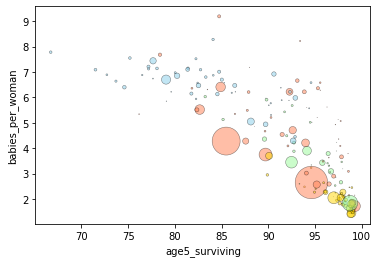

In [9]:
plotdata()

In [31]:
# this is the convention used for statsmodels; define a model, and assign the data.
model = smf.ols(formula='babies_per_woman ~ 1',data=gdata)

In [32]:
# after defining the model, this is how we fit
grandmean = model.fit()

In [12]:
grandmean

In [34]:
def plotfit(fit):
    plotdata()
    pp.scatter(gdata.age5_surviving,fit.predict(gdata), # this is using one explantory variable (surving) against the prediction; note that "fit" is a dummy variable, since we want the function to be general
               c=colors,s=30,linewidths=0.5,edgecolor='k',marker='D')

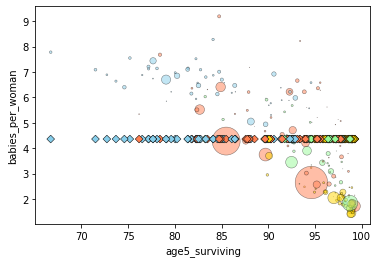

In [14]:
plotfit(grandmean)

this is equivalent to return the mean of all response variables

In [15]:
grandmean.params

Intercept    4.360714
dtype: float64

In [16]:
gdata.babies_per_woman.mean()

4.360714285714285

In [35]:
# to include a model term, place it on the right with a plus; in this example " + region"
groupmeans = smf.ols(formula='babies_per_woman ~ 1 + region',data=gdata).fit()

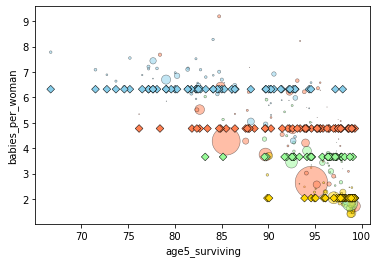

In [18]:
plotfit(groupmeans)

In [19]:
groupmeans.params

Intercept            6.321321
region[T.America]   -2.663139
region[T.Asia]      -1.545744
region[T.Europe]    -4.285639
dtype: float64

In [36]:
# he used the -1 here to make all of them positive
groupmeans = smf.ols(formula='babies_per_woman ~ -1 + region',data=gdata).fit()

In [21]:
groupmeans.params

region[Africa]     6.321321
region[America]    3.658182
region[Asia]       4.775577
region[Europe]     2.035682
dtype: float64

In [37]:
# compare the above with the grouped means
gdata.groupby('region').babies_per_woman.mean()

region
Africa     6.321321
America    3.658182
Asia       4.775577
Europe     2.035682
Name: babies_per_woman, dtype: float64

In [23]:
surviving = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving',data=gdata).fit()

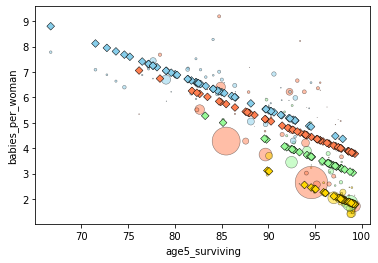

In [24]:
plotfit(surviving)

it appears that the fit improved by adding the age5_surviving variable

In [25]:
surviving.params

region[Africa]     18.265792
region[America]    17.085884
region[Asia]       17.864741
region[Europe]     15.872183
age5_surviving     -0.141886
dtype: float64

age5_surving is a slope (or derivative); it can be interpreted as for every additional percentage point of age5_surving, the number of babies per woman decrease by 0.14

note the constant group terms are very large, because they represent the number of children for survival rate of 0%

In [26]:
surviving_byregion = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving:region',data=gdata).fit()

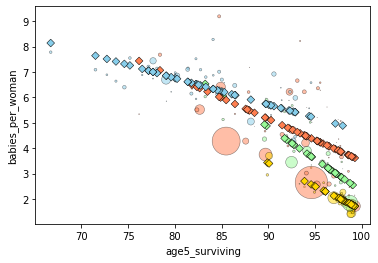

In [27]:
plotfit(surviving_byregion)

In [28]:
surviving_byregion.params

region[Africa]                    15.080914
region[America]                   27.506243
region[Asia]                      20.032483
region[Europe]                    19.884446
age5_surviving:region[Africa]     -0.104053
age5_surviving:region[America]    -0.251994
age5_surviving:region[Asia]       -0.165384
age5_surviving:region[Europe]     -0.183029
dtype: float64

In [38]:
# interaction term is written with the colon :
surviving_byregion_population = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving:region + population',data=gdata).fit()

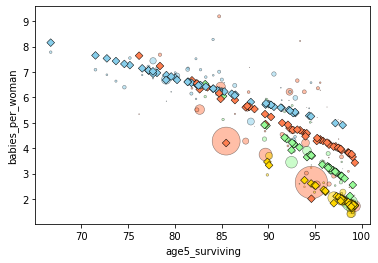

In [30]:
plotfit(surviving_byregion_population)